<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-simulation/blob/master/sbs-simulator/reservoir_simulation_unit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d 

### 1D

In [17]:
# blocks location
block = np.arange(1, 6+1)

# define parameters, in this case blocks are homogeneous and same in size
dx = 250 # ft
dy = 900
dz = 100
kx = 270 # md
B = 1 # RB/STB
mu = 2 # cp

# assign all params to all blocks
dx = np.full(len(block), dx)
dy = np.full(len(block), dy)
dz = np.full(len(block), dz)
kx = np.full(len(block), kx)
B = np.full(len(block), B)
mu = np.full(len(block), mu)

# source term
qsc = np.zeros(len(block)) # initiate with zeros
qsc[2], qsc[3] = 300, -400 # inject the source to block 3 and 4

print('Right-Hand Side (RHS) of Flow equation in each internal block')
print('1st term: Flow in X-direction from previous block')
print('2nd term: Flow in X-direction from next block')
print('3rd term: Source accumulation \n')

for i, j, k in zip(range(0, len(block)-2), range(1, len(block)-1), range(2, len(block))):
  A = dy[j] * dz[j]
  T_min = .001127 * (kx[j] * A) / (mu[j] * B[j] * dx[j])
  T_plus = T_min 
  # print('Before {}, Now {}, After {}'.format(block[i], block[j], block[k]))
  print('Block {}: {} (p{} - p{}) + {} (p{} - p{}) + {}'.format(block[j], T_min, block[i], block[j], T_plus, block[k], block[j], qsc[j]))


Right-Hand Side (RHS) of Flow equation in each internal block
1st term: Flow in X-direction from previous block
2nd term: Flow in X-direction from next block
3rd term: Source accumulation 

Block 2: 54.7722 (p1 - p2) + 54.7722 (p3 - p2) + 0.0
Block 3: 54.7722 (p2 - p3) + 54.7722 (p4 - p3) + 300.0
Block 4: 54.7722 (p3 - p4) + 54.7722 (p5 - p4) + -400.0
Block 5: 54.7722 (p4 - p5) + 54.7722 (p6 - p5) + 0.0


## 2D

### Case 1. From the book

4x3 grid blocks, production in block 3,2

Source term (qsc) in Block 3,2: -400 STB/D
Right-Hand Side (RHS) of Flow equation in each internal block 

Block 2,2: 18.257399999999997 (p1,2 - p2,2) + 18.257399999999997 (p3,2 - p2,2) + 10.330833333333333 (p2,1 - p2,2) + 10.330833333333333 (p2,3 - p2,2) + (0)
Block 3,2: 18.257399999999997 (p2,2 - p3,2) + 18.257399999999997 (p4,2 - p3,2) + 10.330833333333333 (p3,1 - p3,2) + 10.330833333333333 (p3,3 - p3,2) + (-400)


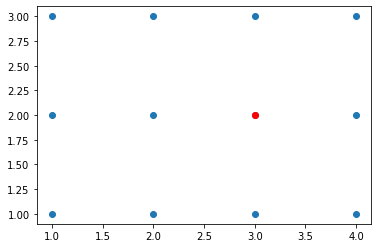

In [18]:
xi = 4; yi = 3 # number of blocks in x and y

# create block coordinates (Engineering Notation convention in Abou-Kassem)
x_ = np.arange(1, xi+1)
y_ = np.arange(1, yi+1)

x, y = np.meshgrid(x_, y_, indexing='ij')

# plot grid points
plt.scatter(x, y)

# Python starts indexing from 0. So, block 1,1 refers to [0,0], block 2,1
# refers to [1,0] and so on. In other words, block i,j refers to [i-1,j-1]

# print('Block {},{}'.format(x[2,1], y[2,1])) # print block 3,2

# define parameters, in this case blocks are homogeneous and same in size
dx = 250 # ft
dy = 300
dz = 100
kx = 270 # md
ky = 220
B = 1 # RB/STB
mu = 2 # cp

# assign all params to all blocks
dx = np.array([[dx]*yi]*xi)
dy = np.array([[dy]*yi]*xi)
dz = np.array([[dz]*yi]*xi)
kx = np.array([[kx]*yi]*xi)
ky = np.array([[ky]*yi]*xi)
B = np.array([[B]*yi]*xi)
mu = np.array([[mu]*yi]*xi)

# source term
xsc = 3; ysc = 2 # grid point (x and y coordinate) of the source 
q = -400 

qsc = np.array([[0]*yi]*xi) # initiate with zeros
qsc[xsc-1,ysc-1] = q # inject the source to block 3,2

# plot the injected grid point
plt.scatter(x[xsc-1,ysc-1], y[xsc-1,ysc-1], color='red')

print('Source term (qsc) in Block {},{}: {} STB/D'. format(x[xsc-1,ysc-1], y[xsc-1,ysc-1], qsc[xsc-1,ysc-1]))

print('Right-Hand Side (RHS) of Flow equation in each internal block \n')

for a, i, c in zip(range(0, xi-2), range(1, xi-1), range(2, xi)):
  for d, j, e in zip(range(0, yi-2), range(1, yi-1), range(2, yi)):
    Ax = dy[i,j] * dz[i,j]
    Ay = dx[i,j] * dz[i,j]

    # flow to x direction
    Tx_min = .001127 * (kx[i,j] * Ax) / (mu[i,j] * B[i,j] * dx[i,j])
    Tx_plus = Tx_min

    # flow to y direction
    Ty_min = .001127 * (ky[i,j] * Ay) / (mu[i,j] * B[i,j] * dy[i,j])
    Ty_plus = Ty_min 
 
    # flow equation
    print('Block {},{}: {} (p{},{} - p{},{}) + {} (p{},{} - p{},{}) + {} (p{},{} - p{},{}) + {} (p{},{} - p{},{}) + ({})'.format(i+1, j+1, Tx_min, a+1, j+1, i+1, j+1, Tx_plus, c+1, j+1, i+1, j+1, Ty_min, i+1, d+1, i+1, j+1, Ty_plus, i+1, e+1, i+1, j+1, qsc[i,j]))   

### Case 2. More grid blocks

7x5 grid blocks, production in block 5,4

Source term (qsc) in Block 5,4: -400 STB/D
Right-Hand Side (RHS) of Flow equation in each internal block 

Block 2,2: 18.257399999999997 (p1,2 - p2,2) + 18.257399999999997 (p3,2 - p2,2) + 10.330833333333333 (p2,1 - p2,2) + 10.330833333333333 (p2,3 - p2,2) + (0)
Block 2,3: 18.257399999999997 (p1,3 - p2,3) + 18.257399999999997 (p3,3 - p2,3) + 10.330833333333333 (p2,2 - p2,3) + 10.330833333333333 (p2,4 - p2,3) + (0)
Block 2,4: 18.257399999999997 (p1,4 - p2,4) + 18.257399999999997 (p3,4 - p2,4) + 10.330833333333333 (p2,3 - p2,4) + 10.330833333333333 (p2,5 - p2,4) + (0)
Block 3,2: 18.257399999999997 (p2,2 - p3,2) + 18.257399999999997 (p4,2 - p3,2) + 10.330833333333333 (p3,1 - p3,2) + 10.330833333333333 (p3,3 - p3,2) + (0)
Block 3,3: 18.257399999999997 (p2,3 - p3,3) + 18.257399999999997 (p4,3 - p3,3) + 10.330833333333333 (p3,2 - p3,3) + 10.330833333333333 (p3,4 - p3,3) + (0)
Block 3,4: 18.257399999999997 (p2,4 - p3,4) + 18.257399999999997 (p4,4 - p3,4) + 10.330833333333333 (p3,3 - p3,4) + 10

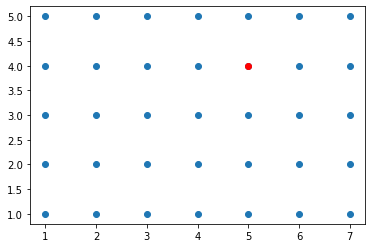

In [19]:
xi = 7; yi = 5 # number of blocks in x and y

# create block coordinates (Engineering Notation convention in Abou-Kassem)
x_ = np.arange(1, xi+1)
y_ = np.arange(1, yi+1)

x, y = np.meshgrid(x_, y_, indexing='ij')

# plot grid points
plt.scatter(x, y)

# Python starts indexing from 0. So, block 1,1 refers to [0,0], block 2,1
# refers to [1,0] and so on. In other words, block i,j refers to [i-1,j-1]

# print('Block {},{}'.format(x[2,1], y[2,1])) # print block 3,2

# define parameters, in this case blocks are homogeneous and same in size
dx = 250 # ft
dy = 300
dz = 100
kx = 270 # md
ky = 220
B = 1 # RB/STB
mu = 2 # cp

# assign all params to all blocks
dx = np.array([[dx]*yi]*xi)
dy = np.array([[dy]*yi]*xi)
dz = np.array([[dz]*yi]*xi)
kx = np.array([[kx]*yi]*xi)
ky = np.array([[ky]*yi]*xi)
B = np.array([[B]*yi]*xi)
mu = np.array([[mu]*yi]*xi)

# source term
xsc = 5; ysc = 4 # grid point (x and y coordinate) of the source 
q = -400 

qsc = np.array([[0]*yi]*xi) # initiate with zeros
qsc[xsc-1,ysc-1] = q # inject the source to block 5,4

# plot the injected grid point
plt.scatter(x[xsc-1,ysc-1], y[xsc-1,ysc-1], color='red')

print('Source term (qsc) in Block {},{}: {} STB/D'. format(x[xsc-1,ysc-1], y[xsc-1,ysc-1], qsc[xsc-1,ysc-1]))

print('Right-Hand Side (RHS) of Flow equation in each internal block \n')

for a, i, c in zip(range(0, xi-2), range(1, xi-1), range(2, xi)):
  for d, j, e in zip(range(0, yi-2), range(1, yi-1), range(2, yi)):
    Ax = dy[i,j] * dz[i,j]
    Ay = dx[i,j] * dz[i,j]

    # flow to x direction
    Tx_min = .001127 * (kx[i,j] * Ax) / (mu[i,j] * B[i,j] * dx[i,j])
    Tx_plus = Tx_min

    # flow to y direction
    Ty_min = .001127 * (ky[i,j] * Ay) / (mu[i,j] * B[i,j] * dy[i,j])
    Ty_plus = Ty_min 
 
    # flow equation
    print('Block {},{}: {} (p{},{} - p{},{}) + {} (p{},{} - p{},{}) + {} (p{},{} - p{},{}) + {} (p{},{} - p{},{}) + ({})'.format(i+1, j+1, Tx_min, a+1, j+1, i+1, j+1, Tx_plus, c+1, j+1, i+1, j+1, Ty_min, i+1, d+1, i+1, j+1, Ty_plus, i+1, e+1, i+1, j+1, qsc[i,j]))  

### Case 3. More grid blocks with more source terms

* 7x5 grid blocks
* Production in block (2,3), (3,2), (4,3) with rate 300 STB/D
* Injection in block (5,4), (6,2) with rate 250 STB/D

Right-Hand Side (RHS) of Flow equation in each internal block
1st term: Flow in X-direction from previous block
2nd term: Flow in X-direction from next block
3rd term: Flow in Y-direction from previous block
4th term: Flow in Y-direction from next block
5th term: Source accumulation 

Block 2,2: 18.257399999999997 (p1,2 - p2,2) + 18.257399999999997 (p3,2 - p2,2) + 10.330833333333333 (p2,1 - p2,2) + 10.330833333333333 (p2,3 - p2,2) + (0)
Block 2,3: 18.257399999999997 (p1,3 - p2,3) + 18.257399999999997 (p3,3 - p2,3) + 10.330833333333333 (p2,2 - p2,3) + 10.330833333333333 (p2,4 - p2,3) + (-300)
Block 2,4: 18.257399999999997 (p1,4 - p2,4) + 18.257399999999997 (p3,4 - p2,4) + 10.330833333333333 (p2,3 - p2,4) + 10.330833333333333 (p2,5 - p2,4) + (0)
Block 3,2: 18.257399999999997 (p2,2 - p3,2) + 18.257399999999997 (p4,2 - p3,2) + 10.330833333333333 (p3,1 - p3,2) + 10.330833333333333 (p3,3 - p3,2) + (-300)
Block 3,3: 18.257399999999997 (p2,3 - p3,3) + 18.257399999999997 (p4,3 - p3,3) + 10.3308

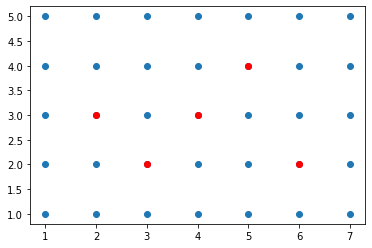

In [42]:
xi = 7; yi = 5 # number of blocks in x and y

# create block coordinates (Engineering Notation convention in Abou-Kassem)
x_ = np.arange(1, xi+1)
y_ = np.arange(1, yi+1)

# meshgrid the block coordinates
x, y = np.meshgrid(x_, y_, indexing='ij')

# plot grid points
plt.scatter(x, y)

# define parameters, in this case blocks are homogeneous and same in size
dx = 250 # ft
dy = 300
dz = 100
kx = 270 # md
ky = 220
B = 1 # RB/STB
mu = 2 # cp

# assign all params to all blocks
# why yi*xi? Python describes a 2D array as (rows, columns), OR (y,x)
dx = np.array([[dx]*yi]*xi)
dy = np.array([[dy]*yi]*xi)
dz = np.array([[dz]*yi]*xi)
kx = np.array([[kx]*yi]*xi)
ky = np.array([[ky]*yi]*xi)
B = np.array([[B]*yi]*xi)
mu = np.array([[mu]*yi]*xi)

# source term

# define the x and y reservoir coordinates 
xsc = np.array([2,3,4,5,6])
ysc = np.array([3,2,3,4,2])

# Python starts indexing from 0. So, block 1,1 refers to [0,0], block 2,1
# refers to [1,0] and so on. In other words, block i,j refers to [i-1,j-1]
xsc = xsc - 1; ysc = ysc - 1

# define rate of each source term 
q = np.array([-300, -300, -300, 250, 250]) 

# initiate with zeros. same method with above dx, dy, kx, ky, etc.
qsc = np.array([[0]*yi]*xi) 

# replace the zeros at coordinate of source term, with the rate of source term
for i, j, k in zip(xsc, ysc, range(len(q))):
  qsc[i][j] = q[k]

# plot the injected grid point
for i, j in zip(xsc, ysc):
  plt.scatter(x[i,j], y[i,j], color='red')

print('Right-Hand Side (RHS) of Flow equation in each internal block')
print('1st term: Flow in X-direction from previous block')
print('2nd term: Flow in X-direction from next block')
print('3rd term: Flow in Y-direction from previous block')
print('4th term: Flow in Y-direction from next block')
print('5th term: Source accumulation \n')

for a, i, c in zip(range(0, xi-2), range(1, xi-1), range(2, xi)):
  for d, j, e in zip(range(0, yi-2), range(1, yi-1), range(2, yi)):
    Ax = dy[i,j] * dz[i,j]
    Ay = dx[i,j] * dz[i,j]

    # flow to x direction
    Tx_min = .001127 * (kx[i,j] * Ax) / (mu[i,j] * B[i,j] * dx[i,j])
    Tx_plus = Tx_min

    # flow to y direction
    Ty_min = .001127 * (ky[i,j] * Ay) / (mu[i,j] * B[i,j] * dy[i,j])
    Ty_plus = Ty_min 
 
    # flow equation
    print('Block {},{}: {} (p{},{} - p{},{}) + {} (p{},{} - p{},{}) + {} (p{},{} - p{},{}) + {} (p{},{} - p{},{}) + ({})'.format(i+1, j+1, Tx_min, a+1, j+1, i+1, j+1, Tx_plus, c+1, j+1, i+1, j+1, Ty_min, i+1, d+1, i+1, j+1, Ty_plus, i+1, e+1, i+1, j+1, qsc[i,j]))  

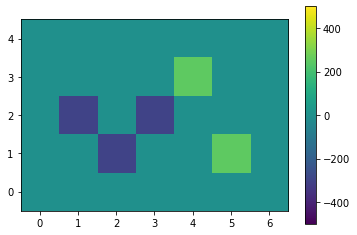

In [78]:
# plt.scatter(x, y)
# plt.imshow(qsc.T, extent=(1.5,xi,1.5,yi), origin='lower', vmin=-500, vmax=500, cmap='viridis', interpolation="none")
plt.imshow(qsc.T, origin='lower', vmin=-500, vmax=500, cmap='viridis', interpolation="none")
# plt.xlim(xmin=0); plt.ylim(ymin=0)
plt.colorbar()

### Explanation of Code in Case 3

This code is hopefully applicable to any 2D case, multiple grid blocks and multiple production / injection grids.

Below is detailed explanation step-by-step.

Define number of blocks in x and y direction, as `xi` and `yi`

Use `np.meshgrid` to generate the x and y grid points

In this case, we are creating 7x5 grid blocks

In [21]:
xi = 7; yi = 5 # number of blocks in x and y

# create block coordinates (Engineering Notation convention in Abou-Kassem)
x_ = np.arange(1, xi+1)
y_ = np.arange(1, yi+1)

x, y = np.meshgrid(x_, y_, indexing='ij')

Concern should be taken care of here. 

The "engineering notation" that Abou-Kassem in the book mentioned is described in the following figure.

<div>
<img src="https://user-images.githubusercontent.com/51282928/87338802-ead39d00-c56f-11ea-8b03-9ee238c6c273.PNG" width="300"/>
</div>

There is a difference on how the reservoir and the numpy `meshgrid` notates. See figure below. The true notation is the reservoir notation, on the left. The right is `meshgrid`. 

<div>
<img src="https://user-images.githubusercontent.com/51282928/87341149-4fdcc200-c573-11ea-908b-bf03c805acf8.png" width="500"/>
</div>

If we plot this meshgrid, the plot will be presenting the true reservoir notation. 






Result of meshgrid
[[1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]
 [5 5 5 5 5]
 [6 6 6 6 6]
 [7 7 7 7 7]] 

[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]] 



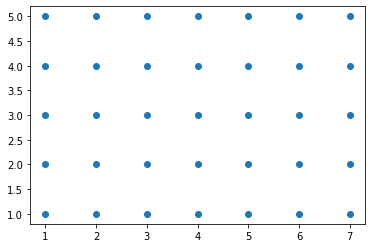

In [22]:
print("Result of meshgrid")
print(x, '\n')
print(y, '\n')

# plot grid points
plt.scatter(x, y)
plt.show()

In [23]:
x.shape

(7, 5)

Input parameters. The reservoir grid blocks are identical in size and homogeneous (constant x-direction permeability `kx` and y-direction permeability `ky` throughout)

In [24]:
# define parameters, in this case blocks are homogeneous and same in size
dx = 250 # ft
dy = 300
dz = 100
kx = 270 # md
ky = 220
B = 1 # RB/STB
mu = 2 # cp

Populate all the gridblocks 

[[   0    0    0    0    0]
 [   0    0 -300    0    0]
 [   0 -300    0    0    0]
 [   0    0 -300    0    0]
 [   0    0    0  250    0]
 [   0  250    0    0    0]
 [   0    0    0    0    0]]
Right-Hand Side (RHS) of Flow equation in each internal block 

Block 2,2: 18.257399999999997 (p1,2 - p2,2) + 18.257399999999997 (p3,2 - p2,2) + 10.330833333333333 (p2,1 - p2,2) + 10.330833333333333 (p2,3 - p2,2) + (0)
Block 2,3: 18.257399999999997 (p1,3 - p2,3) + 18.257399999999997 (p3,3 - p2,3) + 10.330833333333333 (p2,2 - p2,3) + 10.330833333333333 (p2,4 - p2,3) + (-300)
Block 2,4: 18.257399999999997 (p1,4 - p2,4) + 18.257399999999997 (p3,4 - p2,4) + 10.330833333333333 (p2,3 - p2,4) + 10.330833333333333 (p2,5 - p2,4) + (0)
Block 3,2: 18.257399999999997 (p2,2 - p3,2) + 18.257399999999997 (p4,2 - p3,2) + 10.330833333333333 (p3,1 - p3,2) + 10.330833333333333 (p3,3 - p3,2) + (-300)
Block 3,3: 18.257399999999997 (p2,3 - p3,3) + 18.257399999999997 (p4,3 - p3,3) + 10.330833333333333 (p3,2 - p3,3)

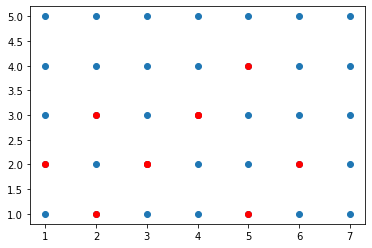

In [25]:
xi = 7; yi = 5 # number of blocks in x and y

# create block coordinates (Engineering Notation convention in Abou-Kassem)
x_ = np.arange(1, xi+1)
y_ = np.arange(1, yi+1)

x, y = np.meshgrid(x_, y_, indexing='ij')

# plot grid points
plt.scatter(x, y)

# Python starts indexing from 0. So, block 1,1 refers to [0,0], block 2,1
# refers to [1,0] and so on. In other words, block i,j refers to [i-1,j-1]

# print('Block {},{}'.format(x[2,1], y[2,1])) # print block 3,2

# define parameters, in this case blocks are homogeneous and same in size
dx = 250 # ft
dy = 300
dz = 100
kx = 270 # md
ky = 220
B = 1 # RB/STB
mu = 2 # cp

# assign all params to all blocks
dx = np.array([[dx]*yi]*xi)
dy = np.array([[dy]*yi]*xi)
dz = np.array([[dz]*yi]*xi)
kx = np.array([[kx]*yi]*xi)
ky = np.array([[ky]*yi]*xi)
B = np.array([[B]*yi]*xi)
mu = np.array([[mu]*yi]*xi)

# source term
xsc = np.array([2,3,4,5,6])
ysc = np.array([3,2,3,4,2]) # grid point (x and y coordinate) of the source 
xsc = xsc - 1; ysc = ysc - 1
q = np.array([-300, -300, -300, 250, 250]) 

qsc = np.array([[0]*yi]*xi) # initiate with zeros

# inject the source to the blocks
for i, j, k in zip(xsc, ysc, range(len(q))):
  qsc[i][j] = q[k]

print(qsc)

# plot the injected grid point
for i, j in zip(xsc, ysc):
  plt.scatter(x[i,j], y[i,j], color='red')

plt.scatter(xsc, ysc, color='red')

print('Right-Hand Side (RHS) of Flow equation in each internal block \n')

for a, i, c in zip(range(0, xi-2), range(1, xi-1), range(2, xi)):
  for d, j, e in zip(range(0, yi-2), range(1, yi-1), range(2, yi)):
    Ax = dy[i,j] * dz[i,j]
    Ay = dx[i,j] * dz[i,j]

    # flow to x direction
    Tx_min = .001127 * (kx[i,j] * Ax) / (mu[i,j] * B[i,j] * dx[i,j])
    Tx_plus = Tx_min

    # flow to y direction
    Ty_min = .001127 * (ky[i,j] * Ay) / (mu[i,j] * B[i,j] * dy[i,j])
    Ty_plus = Ty_min 
 
    # flow equation
    print('Block {},{}: {} (p{},{} - p{},{}) + {} (p{},{} - p{},{}) + {} (p{},{} - p{},{}) + {} (p{},{} - p{},{}) + ({})'.format(i+1, j+1, Tx_min, a+1, j+1, i+1, j+1, Tx_plus, c+1, j+1, i+1, j+1, Ty_min, i+1, d+1, i+1, j+1, Ty_plus, i+1, e+1, i+1, j+1, qsc[i,j])) 

In [26]:
a = [1,2,3,4,5]
c = [20,30,40,50,60]

for i in range(len(a)):
    a[i]=c[i]
    print(a)

[20, 2, 3, 4, 5]
[20, 30, 3, 4, 5]
[20, 30, 40, 4, 5]
[20, 30, 40, 50, 5]
[20, 30, 40, 50, 60]


## 3D

Block 3,2,2


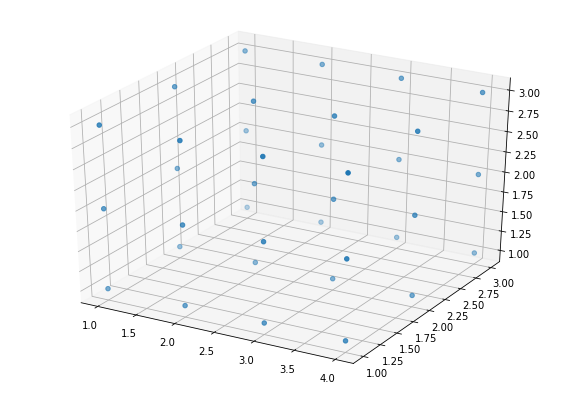

Right-Hand Side (RHS) of Flow equation in each internal block
1st term: Flow in X-direction from previous block
2nd term: Flow in X-direction from next block
3rd term: Flow in Y-direction from previous block
4th term: Flow in Y-direction from next block
5th term: Flow in Z-direction from previous block
6th term: Flow in Z-direction from next block
7th term: Source accumulation 

Block 2,2,2: 6.0857391419999995 (p1,2 - p2,2) + 6.0857391419999995 (p3,2 - p2,2) + 3.443576675 (p2,1 - p2,2) + 3.443576675 (p2,3 - p2,2) + [ 63.39438394383944 (p2,2,1 - p2,2,2) + (-12.7313389786704) ] + [ 63.39438394383944 (p2,2,3 - p2,2,2) + (12.7313389786704) ] + (0)
Block 3,2,2: 6.0857391419999995 (p2,2 - p3,2) + 6.0857391419999995 (p4,2 - p3,2) + 3.443576675 (p3,1 - p3,2) + 3.443576675 (p3,3 - p3,2) + [ 63.39438394383944 (p3,2,1 - p3,2,2) + (-12.7313389786704) ] + [ 63.39438394383944 (p3,2,3 - p3,2,2) + (12.7313389786704) ] + (-133)


In [27]:
xi = 4; yi = 3; zi = 3 # number of blocks in x, y, z

# create block coordinates (Engineering Notation convention in Abou-Kassem)
x_ = np.arange(1, xi+1)
y_ = np.arange(1, yi+1)
z_ = np.arange(1, zi+1)

# meshgrid the block coordinates
x, y, z = np.meshgrid(x_, y_, z_, indexing='ij')

print('Block {},{},{}'.format(x[2,1,1], y[2,1,1], z[2,1,1]))

# plot the grid points
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d") 
ax.scatter3D(x, y, z)
# ax.scatter3D(x[2,1,1], y[2,1,1], z[2,1,1], s=50, color='red')
plt.show()

# define parameters, in this case blocks are homogeneous and same in size
dx = 250 # ft
dy = 300
dz = 33.333
kx = 270 # md
ky = 220
kz = 50
B = 1 # RB/STB
mu = 2 # cp
rho = 55 # fluid density, lbm/ft3

# assign all params to all blocks
# why yi*xi? Python describes a 3D array as (z, rows, columns), OR (z,y,x)
dx = np.array([[[dx]*zi]*yi]*xi)
dy = np.array([[[dy]*zi]*yi]*xi)
dz = np.array([[[dz]*zi]*yi]*xi)
kx = np.array([[[kx]*zi]*yi]*xi)
ky = np.array([[[ky]*zi]*yi]*xi)
kz = np.array([[[kz]*zi]*yi]*xi)
B = np.array([[[B]*zi]*yi]*xi)
mu = np.array([[[mu]*zi]*yi]*xi)
rho = np.array([[[rho]*zi]*yi]*xi)

# source term

# define the x and y reservoir coordinates 
xsc = np.array([3])
ysc = np.array([2])
zsc = np.array([2])

# Python starts indexing from 0. So, block 1,1 refers to [0,0], block 2,1
# refers to [1,0] and so on. In other words, block i,j refers to [i-1,j-1]
xsc = xsc - 1; ysc = ysc - 1; zsc = zsc - 1

# define rate of each source term 
q = np.array([-133.3]) 

# initiate with zeros. same method with above dx, dy, kx, ky, etc.
qsc = np.array([[[0]*zi]*yi]*xi)

# replace the zeros at coordinate of source term, with the rate of source term
for i, j, k, l in zip(xsc, ysc, zsc, range(len(q))):
  qsc[i][j][k] = q[l]

# plot the injected grid point
for i, j, k in zip(xsc, ysc, zsc):
  ax.scatter3D(x[i,j,k], y[i,j,k], z[i,j,k], s=50, color='red')

print('Right-Hand Side (RHS) of Flow equation in each internal block')
print('1st term: Flow in X-direction from previous block')
print('2nd term: Flow in X-direction from next block')
print('3rd term: Flow in Y-direction from previous block')
print('4th term: Flow in Y-direction from next block')
print('5th term: Flow in Z-direction from previous block')
print('6th term: Flow in Z-direction from next block')
print('7th term: Source accumulation \n')

for a, i, c in zip(range(0, xi-2), range(1, xi-1), range(2, xi)):
  for d, j, e in zip(range(0, yi-2), range(1, yi-1), range(2, yi)):
    for f, k, g in zip(range(0, zi-2), range(1, zi-1), range(2, zi)):
      Ax = dy[i,j,k] * dz[i,j,k]
      Ay = dx[i,j,k] * dz[i,j,k]
      Az = dx[i,j,k] * dy[i,j,k]

      # flow to x direction
      Tx_min = .001127 * (kx[i,j,k] * Ax) / (mu[i,j,k] * B[i,j,k] * dx[i,j,k])
      Tx_plus = Tx_min

      # flow to y direction
      Ty_min = .001127 * (ky[i,j,k] * Ay) / (mu[i,j,k] * B[i,j,k] * dy[i,j,k])
      Ty_plus = Ty_min 

      # flow to y direction
      Tz_min = .001127 * (kz[i,j,k] * Az) / (mu[i,j,k] * B[i,j,k] * dz[i,j,k])
      Tz_plus = Tz_min

      # in 3D case (unlike 1D, 2D), the term γ is not neglected, because there is Z
      # for example: block (3,2,1) and block (3,2,2) has Z = -33.33 ft
      # block (3,2,3) and block (3,2,2) has Z = 33.33 ft
      # then, γ is multiplied by Z

      # Z for flow from below
      Z_min = - dz[i,j,k]

      # Z for flow from above
      Z_plus = dz[i,j,k]

      # gamma
      gamma_min = .21584E-3 * rho[i,j,k] * 32.174
      gamma_plus = gamma_min

      Z_gamma_min = Z_min * gamma_min
      Z_gamma_plus = Z_plus * gamma_plus

      # flow equation 
      print('Block {},{},{}: {} (p{},{} - p{},{}) + {} (p{},{} - p{},{}) + {} (p{},{} - p{},{}) + {} (p{},{} - p{},{}) + [ {} (p{},{},{} - p{},{},{}) + ({}) ] + [ {} (p{},{},{} - p{},{},{}) + ({}) ] + ({})'.format(i+1, j+1, k+1, Tx_min, a+1, j+1, i+1, j+1, Tx_plus, c+1, j+1, i+1, j+1, Ty_min, i+1, d+1, i+1, j+1, Ty_plus, i+1, e+1, i+1, j+1, Tz_min, i+1 ,j+1 ,f+1 ,i+1 ,j+1 ,k+1, Z_gamma_min, Tz_plus, i+1 ,j+1 ,g+1 ,i+1 ,j+1 ,k+1, Z_gamma_plus, qsc[i,j,k]))        

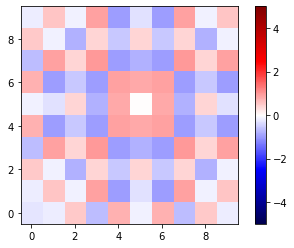

In [41]:
x = np.arange(-5, 5, 1)
y = np.arange(-5, 5, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
# z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
z = np.sin(xx**2 + yy**2) 
plt.imshow(z, origin='lower', vmin=-5, vmax=5, cmap='seismic', interpolation="none")
plt.colorbar()